In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Define Action class
%matplotlib inline
class Actions:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    # Choose a random action
    def choose(self):
        return np.random.randn() + self.m

    # Update the action-value estimate
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x


def run_experiment(m1, m2, m3, eps, N):

    actions = [Actions(m1), Actions(m2), Actions(m3)]
    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for a in actions:
        print(a.mean)

    return cumulative_average

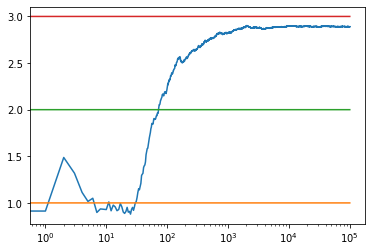

0.9879274746377712
1.981081806508296
2.992097045071865


In [6]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

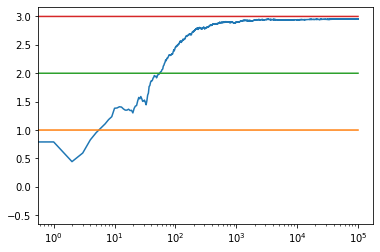

1.0262535735427534
1.9917036428230916
3.000640671639595


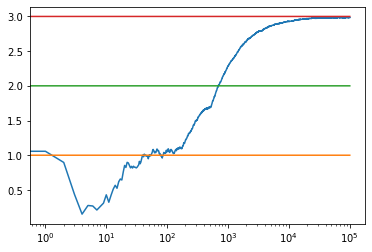

1.0534422789194635
2.006488746752739
3.001533986885524


In [7]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)